# Lung Cancer Mortality

## Carga del dataset

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/usuario/Desktop/Data Scientist - RoBeR/Python/Pruebas/Machine Learning/Examen/Lung-Cancer-Mortality/lung_cancer_mortality_data_large_v2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250000 entries, 0 to 3249999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id                           int64  
 1   age                          float64
 2   gender                       object 
 3   country                      object 
 4   diagnosis_date               object 
 5   cancer_stage                 object 
 6   beginning_of_treatment_date  object 
 7   family_history               object 
 8   smoking_status               object 
 9   bmi                          float64
 10  cholesterol_level            int64  
 11  hypertension                 int64  
 12  asthma                       int64  
 13  cirrhosis                    int64  
 14  other_cancer                 int64  
 15  treatment_type               object 
 16  end_treatment_date           object 
 17  survived                     int64  
dtypes: float64(2), int64(7), object(9)
memory 

## Apartado 1: Analisis Exploratorio de Datos (EDA)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Estadisticas descriptivas

In [3]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06
mean,1.625000e+06,5.499969e+01,3.049276e+01,2.336376e+02,7.498375e-01,4.687280e-01,2.265831e-01,8.802738e-02,2.196006e-01
std,9.381943e+05,1.000122e+01,8.371494e+00,4.344851e+01,4.331065e-01,4.990212e-01,4.186206e-01,2.833348e-01,4.139761e-01
min,1.000000e+00,4.000000e+00,1.600000e+01,1.500000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.125008e+05,4.800000e+01,2.320000e+01,1.960000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.625000e+06,5.500000e+01,3.050000e+01,2.420000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.437500e+06,6.200000e+01,3.770000e+01,2.710000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.250000e+06,1.040000e+02,4.500000e+01,3.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### 1.1 ¿De que pais o region proviene la mayor cantidad de pacientes? 

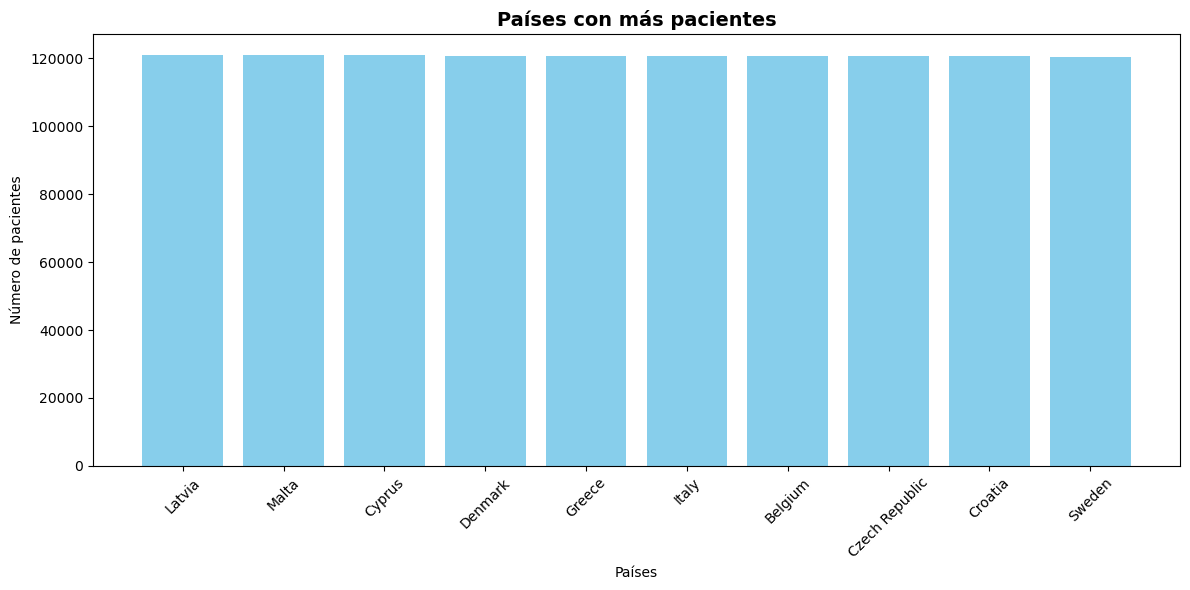

In [12]:
paises = df["country"].value_counts()
plt.figure(figsize=(12, 6))
paises_top = paises.head(10)
plt.bar(range(len(paises_top)), paises_top.values, color="skyblue")
plt.title("Países con más pacientes", fontsize=14, fontweight="bold")
plt.ylabel("Número de pacientes")
plt.xlabel("Países")
plt.xticks(range(len(paises_top)), paises_top.index, rotation=45)
plt.tight_layout()
plt.show()

Como podemos ver, el pais con mayor numero de pacientes seria Latvia, seuigo de Malta, Chipre, Dinamarca y Grecia

### 1.3 ¿Que relacion existe entre el genero y la supervivencia?

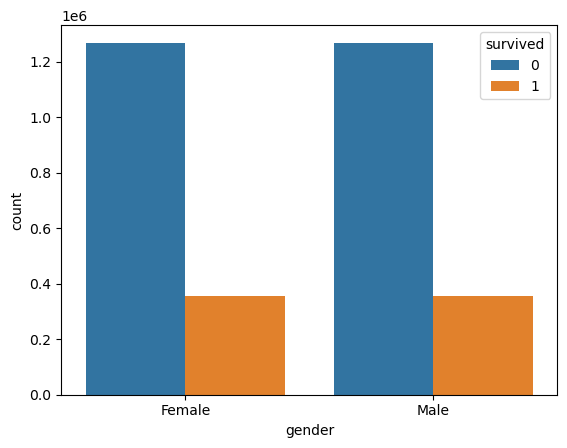

In [11]:
sns.countplot(x="gender", hue="survived", data=df)
plt.show()

Como podemos ver el genero no parece tener mucha relevancia en la supervivencia, ya que como podemos ver en este grafico ambos generos practicamente tienen los mismos numeros

## Apartado 2:Preprocesamiento de datos

### 2.1 Valores faltantes

In [5]:
valoresNulos = df.isnull().sum()
print(f"Numero de valores nulos por cada columna:\n{valoresNulos}")

Numero de valores nulos por cada columna:
id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64


No parece haber valores faltantes en el dataset

### Separacion de columnas numericas y categoricas

In [7]:
columnasCategoricas = df.select_dtypes(include=["object"]).columns

columnasNumericas = df.select_dtypes(include=[np.number]).columns

### 2.2 Codificacion de  las variables categoricas

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), columnasCategoricas)
    ],
    remainder="passthrough" 
)

df_transformado = preprocessor.fit_transform(df)

columnasCodificadas = preprocessor.named_transformers_["cat"].get_feature_names_out(columnasCategoricas)
columnasNormales = train.drop(columns=columnasCategoricas).columns

df_codificado = pd.DataFrame(train_transformado, columns=list(columnasCodificadas) + list(columnasNormales))
df_codificado.info()

### 2.3 Normalizacion de las columnas numericas

In [15]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

df[columnasNumericas] = scaler.fit_transform(df[columnasNumericas])
df[columnasNumericas].describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06
mean,1.679067e-17,1.461969e-17,-1.717983e-17,2.361188e-17,6.921779e-18,2.798445e-17,-3.608683e-17,-2.055108e-18,2.404695e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732050e+00,-5.099347e+00,-1.731204e+00,-1.924982e+00,-1.731301e+00,-9.392949e-01,-5.412612e-01,-3.106834e-01,-5.304669e-01
25%,-8.660251e-01,-6.998841e-01,-8.711422e-01,-8.662573e-01,-1.731301e+00,-9.392949e-01,-5.412612e-01,-3.106834e-01,-5.304669e-01
50%,-1.768617e-16,3.055012e-05,8.647957e-04,1.924673e-01,5.776004e-01,-9.392949e-01,-5.412612e-01,-3.106834e-01,-5.304669e-01
75%,8.660251e-01,6.999452e-01,8.609265e-01,8.599240e-01,5.776004e-01,1.064628e+00,-5.412612e-01,-3.106834e-01,-5.304669e-01
max,1.732050e+00,4.899433e+00,1.732933e+00,1.527381e+00,5.776004e-01,1.064628e+00,1.847537e+00,3.218711e+00,1.885132e+00


### 2.4 Seleccion columnas relevantes

Primero haremos un mapa de calor de correlacion, y asi de esta manera poder cojer las columnas mas correlacionadas

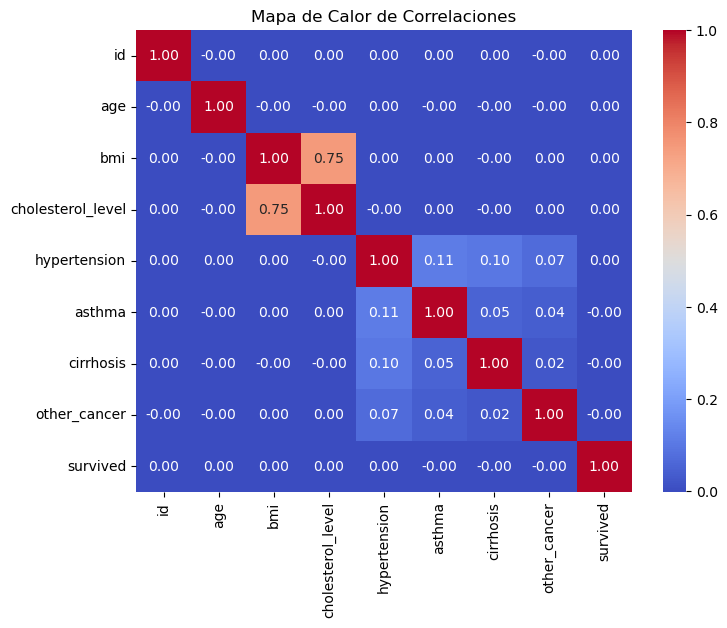

In [25]:
corr = df_codificado.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()


## Apartado 3: Prediccion y Evaluacion del modelo

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
X = df.drop(columns=["survived"])
y = df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)   


In [ ]:
grid_search.fit(X_train, y_train)

mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))